<a href="https://colab.research.google.com/github/Ami1ra1/projects/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**استيراد المكتبات**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1.   تحميل البيانات
2.   عرض أول 5 صفوف للتأكد من تحميل البيانات
3. عرض معلومات عن البيانات


In [ ]:
data = pd.read_csv('titanic.csv')
print(data.head())
print(data.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

القيم المفقودة

In [ ]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**اعداد الناجين   حسب الجنس**

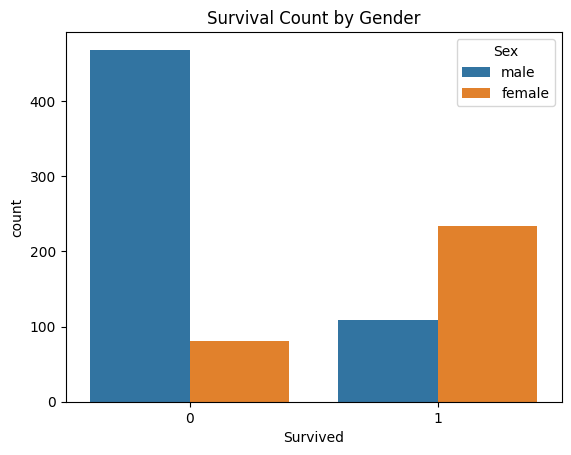

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count by Gender')
plt.show()

اعداد الناجين حسب الفئة

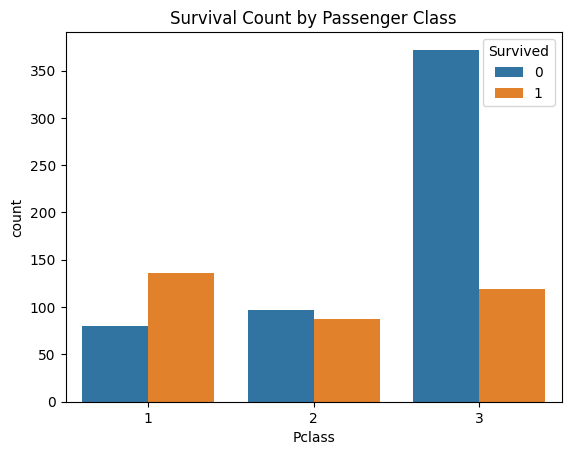

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.show()

توزيع  الأعمار

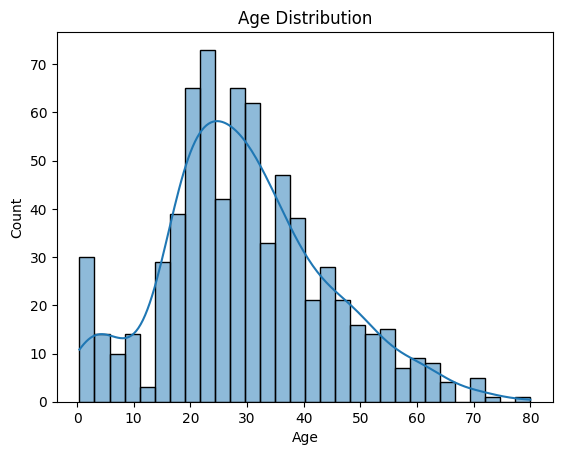

In [ ]:
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

تنظيف البيانات
  القيم المفقودة في الأعمار بمتوسط العمر

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)


<ipython-input-7-ca72a6c8cabd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


 mode تعويض القيم المفقودة في Embarked


In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

<ipython-input-8-e67f7aa8e8b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


 التحقق من  القيم مفقودة

In [ ]:
print("\nMissing Values After Cleaning:\n", data.isnull().sum())



Missing Values After Cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
data.drop(columns=['Cabin'], inplace=True)
print("\nColumns after dropping 'Cabin':\n", data.columns)


Columns after dropping 'Cabin':
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [ ]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'})




In [ ]:

data['Age'] = data['Age'].astype('float32')


print(data['Age'].dtype)



float32


In [ ]:
# بناء نموذج تنبؤي
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# تحديد المتغيرات المستقلة والتابعة
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء النموذج
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# التنبؤ
y_pred = model.predict(X_test)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7262569832402235

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       105
           1       0.70      0.59      0.64        74

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.72      0.73      0.72       179



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# تحميل البيانات
data = pd.read_csv('titanic.csv')

# تحويل الأعمدة الفئوية (مثل 'Sex' و 'Embarked') إلى أعمدة منفصلة باستخدام pd.get_dummies
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# معالجة القيم المفقودة
data['Age'].fillna(data['Age'].median(), inplace=True)  # تعويض القيم المفقودة في 'Age' بالمتوسط
data['Embarked_Q'].fillna(data['Embarked_Q'].mode()[0], inplace=True)  # تعويض القيم المفقودة في 'Embarked_Q'
data['Embarked_S'].fillna(data['Embarked_S'].mode()[0], inplace=True)  # تعويض القيم المفقودة في 'Embarked_S'

# تقليل حجم البيانات باستخدام `float32` للأعمدة العشرية
data['Age'] = data['Age'].astype('float32')
data['Fare'] = data['Fare'].astype('float32')

# تحديد المتغيرات المستقلة والتابعة
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء نموذج RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ
y_pred = model.predict(X_test)

# تقييم النموذج

# 1. الدقة
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 2. التقرير التصنيفي
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 3. مصفوفة الالتباس (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# 4. استخراج الأهمية النسبية للميزات
feature_importances = model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")
#حفظ البيانات
data.to_csv('cleaned_titanic.csv', index=False)


<ipython-input-50-99f051fe243e>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # تعويض القيم المفقودة في 'Age' بالمتوسط
<ipython-input-50-99f051fe243e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[91 14]
 [18 56]]

Feature Importances:
Pclass: 0.0793
Age: 0.2504
SibSp: 0.0520
Parch: 0.0385
Fare: 0.2719
Sex_male: 0.2743
Embarked_Q: 0.0094
Embarked_S: 0.0242


In [ ]:
import pandas as pd

# تحميل البيانات من ملف CSV
data = pd.read_csv('titanic.csv')

# تعويض القيم المفقودة في عمود 'Age' باستخدام المتوسط
data['Age'] = data['Age'].fillna(data['Age'].mean())

# تعويض القيم المفقودة في عمود 'Embarked' باستخدام القيمة الأكثر تكرارًا
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# تغيير الحروف في عمود 'Embarked' إلى الأسماء الأصلية
data['Embarked'] = data['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# تحويل العمود 'Sex' من نص إلى أرقام (ذكر = 1، أنثى = 0)
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# حفظ البيانات المحسّنة إلى ملف Excel
output_path = 'titanic_data_processed.xlsx'
data.to_excel(output_path, index=False)

# تحميل البيانات المحفوظة للتأكد من أنها تم حفظها بشكل صحيح
saved_data = pd.read_excel(output_path)

# طباعة أول 5 صفوف من البيانات المحفوظة للتحقق
print(saved_data.head())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin     Embarked  
0         A/5 21171   7.2500   NaN  Southampton  
1          PC 17599  71.2833   C85    Cherbourg  
2  STON/O2. 3101282   7.9250   NaN  Southampton  
3            113803  53.1000  C123  Southampton  
4            373450   8.0500   NaN  Southampto